In [4]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
from matplotlib import cm
from __future__ import print_function
import numpy.testing as npt
from astropy.wcs import WCS
import sys


In [5]:
sys.path.insert(1, './sip2pv1')
import sip_to_pv
import pv_to_sip


In [6]:
#some path and names:
path_to_bias = './data/BIAS/'
path_to_flat = './data/FLAT/'
path_to_obj = './data/OBJ/'
path_to_reduc = './data/reduc/'
path_to_sex = '../astrofiles/'
band = ['U','B','V','R','ha']

DETECT_THRESH=1

target_name = np.array(['M31','M86','NGC4631', 'NGC4258'])
target_ra = np.array(['00:42:44.3503','12:26:11.814','12:42:08.0', '12:18:57.5'])
target_dec = np.array(['+41:16:08.634','+12:56:45.49','+32:32:29', '+47:18:14'])


In [7]:
#median the bias
biasfiles=glob.glob(path_to_bias+'*.fit')
allbias=[]
for i,ibias in enumerate(biasfiles):
    data=fits.getdata(ibias)
    allbias.append(data)
allbias=np.array(allbias)
superbias=np.median(allbias,axis=0)
fits.writeto(path_to_bias+'bias.fit',superbias.astype('float32'),overwrite=True)

Text(0.5,1,'bias drived from bias frames')

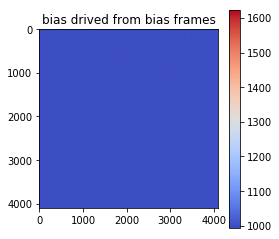

In [8]:
# check the bias
plt.figure(figsize=(4,4))
plt.imshow(superbias,cmap=cm.coolwarm)
plt.colorbar()
plt.title("bias drived from bias frames")

In [9]:
flat=glob.glob(path_to_flat+"Flat_"+str(band[0])+"_*.fit")
allflat=[]
flat

['./data/FLAT/Flat_U_10s_1.fit',
 './data/FLAT/Flat_U_16s_2.fit',
 './data/FLAT/Flat_U_18s_3.fit']

Text(0.5,1,'flat 0')

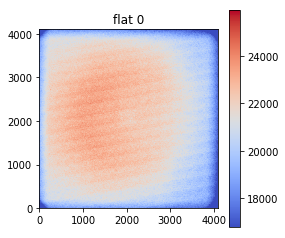

In [10]:
## check flat
plt.figure(figsize=(4,4))
plt.imshow(fits.getdata(flat[0]),vmin = fits.getdata(flat[0]).mean() - 3*fits.getdata(flat[0]).std(),vmax = fits.getdata(flat[0]).mean() + 3*fits.getdata(flat[0]).std(), origin='lower',cmap = cm.coolwarm)
plt.colorbar()
plt.title("flat 0")


In [12]:
#check flat list
for i_band, iband in enumerate(band):
    flat=glob.glob(path_to_flat+"Flat_"+iband+"_*.fit")
    allflat=[]
    print(flat)

['./data/FLAT/Flat_U_10s_1.fit', './data/FLAT/Flat_U_16s_2.fit', './data/FLAT/Flat_U_18s_3.fit']
['./data/FLAT/Flat_B_24s_4.fit', './data/FLAT/Flat_B_30s_5.fit', './data/FLAT/Flat_B_20s_3.fit', './data/FLAT/Flat_B_18s_2.fit', './data/FLAT/Flat_B_18s_1.fit']
['./data/FLAT/Flat_V_18s_5.fit', './data/FLAT/Flat_V_9s_1.fit', './data/FLAT/Flat_V_16s_4.fit', './data/FLAT/Flat_V_10s_2.fit', './data/FLAT/Flat_V_12s_3.fit']
['./data/FLAT/Flat_R_6s_3.fit', './data/FLAT/Flat_R_6s_2.fit', './data/FLAT/Flat_R_8s_4.fit', './data/FLAT/Flat_R_3s_1.fit', './data/FLAT/Flat_R_9s_5.fit']
['./data/FLAT/Flat_ha_12s_3.fit', './data/FLAT/Flat_ha_18s_5.fit', './data/FLAT/Flat_ha_16s_4.fit', './data/FLAT/Flat_ha_8s_2.fit', './data/FLAT/Flat_ha_8s_1.fit']


In [66]:
#for each band, build flat by the median of target subtracted image, normalize it to the value about 1.
for i_band, iband in enumerate(band):
    flat=glob.glob(path_to_flat+"Flat_"+iband+"_*.fit")
    allflat=[]
    
    for i_flat, iflat in enumerate(flat):
        
        data=fits.getdata(iflat)-fits.getdata(path_to_bias+'bias.fit')
        fits.writeto(iflat.replace(path_to_flat, path_to_flat+'b'), data.astype('float32'),overwrite=True)
        os.system('sex '+iflat.replace(path_to_flat, path_to_flat+'b') + ' -c '+path_to_sex+'bg.sex -CATALOG_TYPE NONE -PARAMETERS_NAME ../astrofiles/default.param -DETECT_THRESH '+str(DETECT_THRESH))    
        data=fits.getdata('objsub.fits')+fits.getdata('bg.fits')
        allflat.append(data)
        
    allflat=np.array(allflat)
    print(allflat.shape)
    medianflat=np.median(allflat,axis=0)
    fits.writeto(path_to_flat+'flat_'+iband+'.fit',medianflat.astype('float32'),overwrite=True)
    medianflat_norm = medianflat / np.median(medianflat)
    fits.writeto(path_to_flat+'flat_'+iband+'_norm.fit',medianflat_norm.astype('float32'),overwrite=True)


(3, 4108, 4096)
(5, 4108, 4096)
(5, 4108, 4096)
(5, 4108, 4096)
(5, 4108, 4096)


In [122]:
#check the objlist
bias = fits.getdata(path_to_bias+'bias.fit')
for i_band, iband in enumerate(band):
    flat_band = fits.getdata(path_to_flat+'flat_'+iband+'_norm.fit')
    print(path_to_flat+'flat_'+iband+'_norm.fit')
    objlist=glob.glob(path_to_obj+'*'+iband+'*.fit')
    print(objlist)

./data/FLAT/flat_U_norm.fit
['./data/OBJ/M31-004_U_1.fit', './data/OBJ/NGC4258-004_U_1.fit', './data/OBJ/NGC4258-005_U_1.fit', './data/OBJ/NGC4258-007_U_1.fit', './data/OBJ/NGC4258-006_U_1.fit', './data/OBJ/NGC4258-003_U_1.fit', './data/OBJ/NGC4258-002_U_1.fit', './data/OBJ/NGC4258-001_U_1.fit']
./data/FLAT/flat_B_norm.fit
['./data/OBJ/NGC4258-001_B_1.fit', './data/OBJ/M31-004_B_1.fit']
./data/FLAT/flat_V_norm.fit
['./data/OBJ/M31-004_V_1.fit', './data/OBJ/NGC4258-001_V_1.fit']
./data/FLAT/flat_R_norm.fit
['./data/OBJ/M31-004_R_1.fit', './data/OBJ/M31-001_R_1.fit', './data/OBJ/NGC4258-001_R_1.fit', './data/OBJ/M31-002_R_1.fit']
./data/FLAT/flat_ha_norm.fit
['./data/OBJ/NGC4258-039_ha_1.fit', './data/OBJ/NGC4258-038_ha_1.fit', './data/OBJ/NGC4258-007_ha_1.fit', './data/OBJ/NGC4258-006_ha_1.fit', './data/OBJ/NGC4631-002_ha.fit', './data/OBJ/M86-041_ha.fit', './data/OBJ/M86-022_ha.fit', './data/OBJ/NGC4258-033_ha_1.fit', './data/OBJ/M86-053_ha.fit', './data/OBJ/NGC4258-032_ha_1.fit', './d

In [123]:
#subtract the bias, then divide the flat for each band:

bias = fits.getdata(path_to_bias+'bias.fit')
for i_band, iband in enumerate(band):
    flat_band = fits.getdata(path_to_flat+'flat_'+iband+'_norm.fit')
    print(path_to_flat+'flat_'+iband+'_norm.fit')
    objlist=glob.glob(path_to_obj+'*'+iband+'*.fit')
    for i_obj, iobjlist in enumerate(objlist):
        fits.writeto(iobjlist.replace(path_to_obj, path_to_reduc+'fb'), ((fits.getdata(iobjlist) - bias)/flat_band).astype('float32'), fits.getheader(iobjlist,0), overwrite=True)



./data/FLAT/flat_U_norm.fit
./data/FLAT/flat_B_norm.fit
./data/FLAT/flat_V_norm.fit
./data/FLAT/flat_R_norm.fit
./data/FLAT/flat_ha_norm.fit


In [14]:
objlist=glob.glob(path_to_obj+'*'+iband+'*.fit')

for i_obj, iobjlist in enumerate(objlist):
    name = iobjlist.replace(path_to_obj, path_to_reduc+'fb')
    print(name)

./data/reduc/fbNGC4258-039_ha_1.fit
./data/reduc/fbNGC4258-038_ha_1.fit
./data/reduc/fbNGC4258-007_ha_1.fit
./data/reduc/fbNGC4258-006_ha_1.fit
./data/reduc/fbNGC4631-002_ha.fit
./data/reduc/fbM86-041_ha.fit
./data/reduc/fbM86-022_ha.fit
./data/reduc/fbNGC4258-033_ha_1.fit
./data/reduc/fbM86-053_ha.fit
./data/reduc/fbNGC4258-032_ha_1.fit
./data/reduc/fbM86-030_ha.fit
./data/reduc/fbM86-018_ha.fit
./data/reduc/fbM86-006_ha.fit
./data/reduc/fbM86-014_ha.fit
./data/reduc/fbM31-002_ha_1.fit
./data/reduc/fbM86-032_ha.fit
./data/reduc/fbM31-003_ha_1.fit
./data/reduc/fbM86-051_ha.fit
./data/reduc/fbM86-020_ha.fit
./data/reduc/fbM86-043_ha.fit
./data/reduc/fbM86-016_ha.fit
./data/reduc/fbM86-008_ha.fit
./data/reduc/fbM86-004_ha.fit
./data/reduc/fbNGC4258-010_ha_1.fit
./data/reduc/fbNGC4258-011_ha_1.fit
./data/reduc/fbNGC4258-024_ha_1.fit
./data/reduc/fbNGC4258-025_ha_1.fit
./data/reduc/fbM31-004_ha_1.fit
./data/reduc/fbM86-012_ha.fit
./data/reduc/fbNGC4258-029_ha_1.fit
./data/reduc/fbNGC4258-0

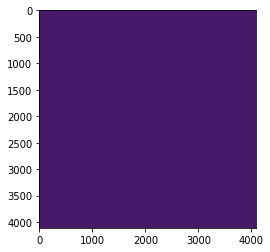

In [22]:
#should check image, use ds9
img = fits.getdata(iobjlist.replace(path_to_obj, path_to_reduc+'fb'))
vmin = img.mean() - 3*img.std()
vmax = img.mean() + 3*img.std()
plt.imshow(np.log(img), vmin=vmin, vmax = vmax)

In [126]:
#solve astrometry by astrometry.net:
for i_band, iband in enumerate(band):
    for i_target, itarget in enumerate(target_name):
        objlist = glob.glob(path_to_reduc+'fb'+itarget+'*'+iband+'*.fit')
        print(objlist)
        for i_obj, iobj in enumerate(objlist):
            os.system('solve-field  --ra '+target_ra[i_target]+' --dec '+target_dec[i_target]+' --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 '+iobj)
            print('solve-field  --ra '+target_ra[i_target]+' --dec '+target_dec[i_target]+' --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 '+iobj)
            #break


['./data/reduc/fbM31-004_U_1.fit']
solve-field  --ra 00:42:44.3503 --dec +41:16:08.634 --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 ./data/reduc/fbM31-004_U_1.fit
[]
[]
['./data/reduc/fbNGC4258-003_U_1.fit', './data/reduc/fbNGC4258-002_U_1.fit', './data/reduc/fbNGC4258-001_U_1.fit', './data/reduc/fbNGC4258-004_U_1.fit', './data/reduc/fbNGC4258-005_U_1.fit', './data/reduc/fbNGC4258-007_U_1.fit', './data/reduc/fbNGC4258-006_U_1.fit']
solve-field  --ra 12:18:57.5 --dec +47:18:14 --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 ./data/reduc/fbNGC4258-003_U_1.fit
solve-field  --ra 12:18:57.5 --dec +47:18:14 --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 ./data/reduc/fbNGC4258-002_U_1.fit
solve-field  --ra 12:18:57.5 --dec +47:18:14 --radius 1  --scale-units degwidth --scale-low 1 --scale-high 2 --no-plots --tweak-order 3 ./data/reduc/fbNGC4258-001_U_1.fit
solve

In [131]:
#change SIP projection to PV projection:
#this is not necessary if astrometry is solved by SCAMP
for i_band, iband in enumerate(band):
    for i_target, itarget in enumerate(target_name):
        newlist = glob.glob(path_to_reduc+'fb'+itarget+'*'+iband+'*.new')
        for i_new, inewlist in enumerate(newlist):
            header = fits.getheader(inewlist,0)
            img = fits.getdata(inewlist,0)
            sip_to_pv.sip_to_pv(header)
            fits.writeto(inewlist+'.wcs.fits', img, header, output_verify="ignore", overwrite=True)    


In [132]:
#remove bg with astnoisechisel
#this is not necessary
for i_band, iband in enumerate(band):
    for i_target, itarget in enumerate(target_name):
        wcslist = glob.glob(path_to_reduc+'fb'+itarget+'*'+iband+'*.new.wcs.fits')
        for i_list, iwcslist in enumerate(wcslist):
            os.system('astnoisechisel '+iwcslist+' -h0 -o '+iwcslist.replace('.fits','_detected.fits'))

#for i_list = 0, n_elements(namelist) - 1 do spawn, 'astnoisechisel '+namelist[i_list]+' -h0'


In [20]:
#make list for swarp
os.system('ulimit -n 1000 ')
for i_band, iband in enumerate(band):
    for i_target, itarget in enumerate(target_name):
        wcslist = glob.glob(path_to_reduc+'fb'+itarget+'*'+iband+'*.new.wcs_detected.fits')
        if wcslist == []:
            break
        with open(path_to_reduc+itarget+'-'+iband+'.list', 'w') as filesave:
            for i_list, ilist in enumerate(wcslist):
                filesave.write('%s\n' % ilist.replace('fits','fits[1]'))
        os.system('swarp @'+ path_to_reduc+itarget+'-'+iband+'.list'+' -c ../astrofiles/stack.swarp -IMAGEOUT_NAME '+path_to_reduc+target_name[i_target]+'-'+band[i_band]+'.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600')


swarp @./data/reduc/M31-B.list -c ../astrofiles/stack.swarp -IMAGEOUT_NAME ./data/reduc/M31-B.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600
swarp @./data/reduc/M31-V.list -c ../astrofiles/stack.swarp -IMAGEOUT_NAME ./data/reduc/M31-V.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600
swarp @./data/reduc/M31-R.list -c ../astrofiles/stack.swarp -IMAGEOUT_NAME ./data/reduc/M31-R.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600
swarp @./data/reduc/M31-ha.list -c ../astrofiles/stack.swarp -IMAGEOUT_NAME ./data/reduc/M31-ha.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600
swarp @./data/reduc/M86-ha.list -c ../astrofiles/stack.swarp -IMAGEOUT_NAME ./data/reduc/M86-ha.sci.median.fits -RESAMPLING_TYPE BILINEAR -SUBTRACT_BACK N -MEM_MAX 25600 -COMBINE_BUFSIZE 25600
swarp @./data/reduc/NGC4631-ha.list -c ..